In [1]:
import pandas as pd

In [2]:
# Load the Excel file
file_path = "mercedes_data.xlsx"  # your Excel file path
df_raw = pd.read_excel(file_path, sheet_name="Raw Data")
df_feat = pd.read_excel(file_path, sheet_name="Feature Engineering")
df_churn = pd.read_excel(file_path, sheet_name="Churn Analysis")

In [3]:
print(df_raw.head())
print(df_raw.describe())
print(df_raw.isnull().sum())  # check for missing values

  Vehicle ID      Vehicle Name Vehicle Type  Age (Years)  Mileage (KM)  \
0       V001  Mercedes A-Class    Hatchback            3         34000   
1       V002  Mercedes B-Class          MPV            4         48000   
2       V003  Mercedes C-Class        Sedan            2         27000   
3       V004  Mercedes E-Class        Sedan            6         89000   
4       V005  Mercedes S-Class        Sedan            5         76000   

  Engine Size (L) Fuel Type  Service Clients  Complaints  
0             1.6    Petrol                2           0  
1             1.8    Diesel                3           1  
2               2    Petrol                1           0  
3             2.2    Diesel                5           2  
4               3    Petrol                4           1  
       Age (Years)  Mileage (KM)  Service Clients  Complaints
count    25.000000     25.000000        25.000000        25.0
mean      3.760000  51320.000000         3.000000         1.0
std       1.738

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

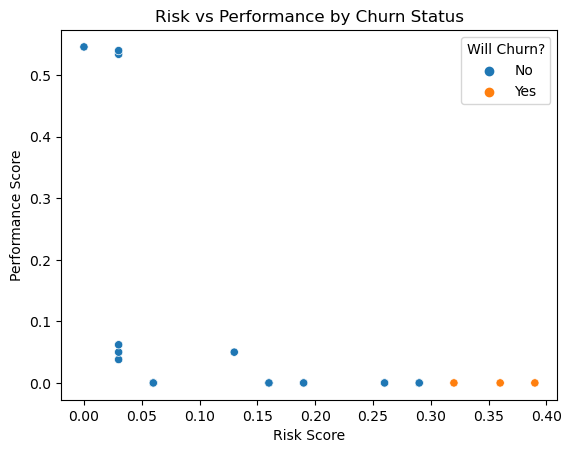

In [5]:
# Scatter: Risk Score vs Performance
sns.scatterplot(data=df_feat, x='Risk Score', y='Performance Score', hue=df_churn['Will Churn?'])
plt.title("Risk vs Performance by Churn Status")
plt.show()

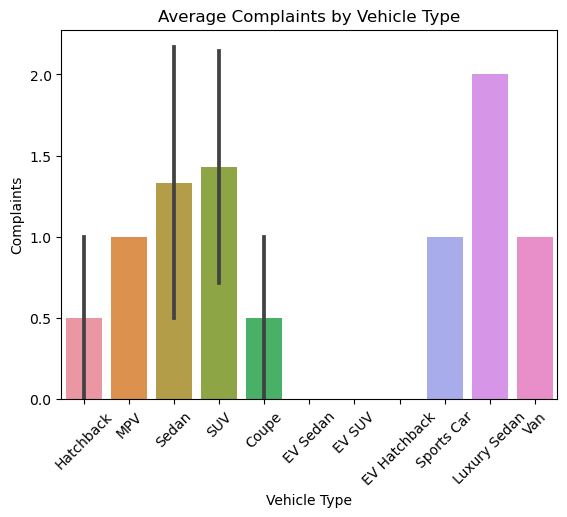

In [6]:
# Bar Chart: Vehicle Type vs Complaints
sns.barplot(data=df_raw, x='Vehicle Type', y='Complaints')
plt.title("Average Complaints by Vehicle Type")
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


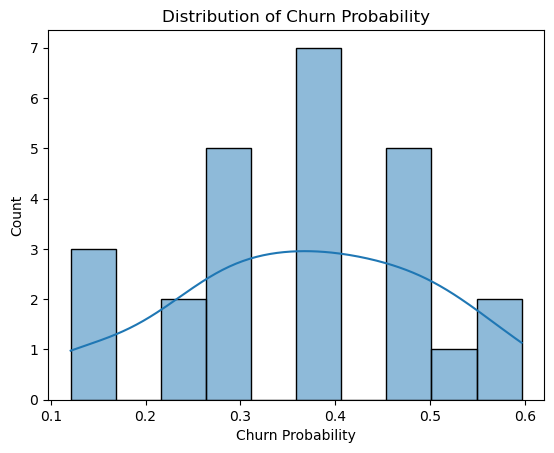

In [7]:
# Histogram: Churn Probability Distribution
sns.histplot(df_churn['Churn Probability'], bins=10, kde=True)
plt.title("Distribution of Churn Probability")
plt.show()

In [8]:
# Combine features and churn info
df_model = pd.concat([df_feat, df_churn[['Churn Probability', 'Will Churn?']]], axis=1)
df_model['Will Churn?'] = df_model['Will Churn?'].map({'Yes': 1, 'No': 0})

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
features = ['Risk Score', 'Performance Score', 'Efficiency Score']
X = df_model[features]
y = df_model['Will Churn?']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
y_pred = model.predict(X_test)

In [14]:
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


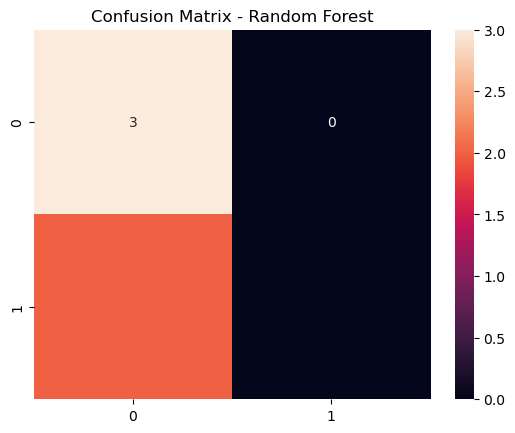

In [15]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_log_pred = log_model.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_log_pred))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.cluster import KMeans

In [20]:
segment_features = df_feat[['Risk Score', 'Performance Score', 'Efficiency Score']]
kmeans = KMeans(n_clusters=3, random_state=42)
df_feat['Segment'] = kmeans.fit_predict(segment_features)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


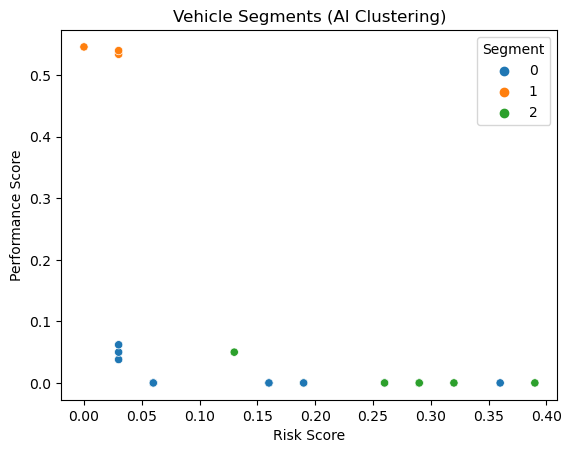

In [21]:
# Plot the Segments
sns.scatterplot(data=df_feat, x='Risk Score', y='Performance Score', hue='Segment', palette='tab10')
plt.title("Vehicle Segments (AI Clustering)")
plt.show()

In [22]:
df_final = pd.concat([df_raw, df_feat[['Risk Score', 'Performance Score', 'Efficiency Score', 'Segment']], df_churn], axis=1)

df_final.to_excel("mercedes_final_output.xlsx", index=False)